<a href="https://colab.research.google.com/github/Vigneshprabhu078/Machine_Learning_Projects/blob/main/7_Car_Price_Prediction_using_Linear_and_Lasso_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Predicting Car Prices: Leveraging Linear Regression and Lasso in Machine Learning** - Vignesh Prabhu


In car prediction using machine learning with linear regression and Lasso, I developed models that use these techniques to analyze how different factors (like mileage, model year, etc.) affect car prices. Linear regression finds direct relationships, while Lasso helps by selecting the most important features, improving prediction accuracy by reducing overfitting. These models help forecast car prices based on data-driven insights, supporting better decision-making in the automotive market.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

**Data Collection and PreProcessing**

In [ ]:
car_data=pd.read_csv("/content/car data.csv")

In [ ]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
car_data.shape

(301, 9)

In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
#to Check null values in dataset
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
# checking distribution of categorical Data
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


**Encoding The categorical Data**

In [ ]:
#Encoding "Fuel Type"
car_data.replace({'Fuel_Type':{'Petrol': 0, 'Diesel':1,'CNG'  :2}},inplace=True)
#Encoding "Seller Type"
car_data.replace({'Seller_Type':{'Dealer': 0, 'Individual':1}},inplace=True)
#Encoding "Transmission"
car_data.replace({'Transmission':{'Manual': 0, 'Automatic':1}},inplace=True)

In [ ]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


**Spliting Data Into  Label Data and Target data**

In [ ]:
X=car_data.drop(['Car_Name','Selling_Price'],axis=1)
Y=car_data['Selling_Price']

In [ ]:
print(X)
print(Y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

**Spliting Training and testing Data**

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape,)

(301, 7) (270, 7) (31, 7)


**Model Training**

In [ ]:
lin_reg=LinearRegression()

In [ ]:

lin_reg.fit(X_train, Y_train)

LinearRegression()

**Model Evalutaion**

In [ ]:
#Prediction on Training Data
prediction_train=lin_reg.predict(X_train)


In [ ]:
#R squared Error
error_score=metrics.r2_score(Y_train,prediction_train)
print("R squared Error : ",error_score)

R squared Error :  0.8799451660493711


**Visualise the Actual and Predicted Price**

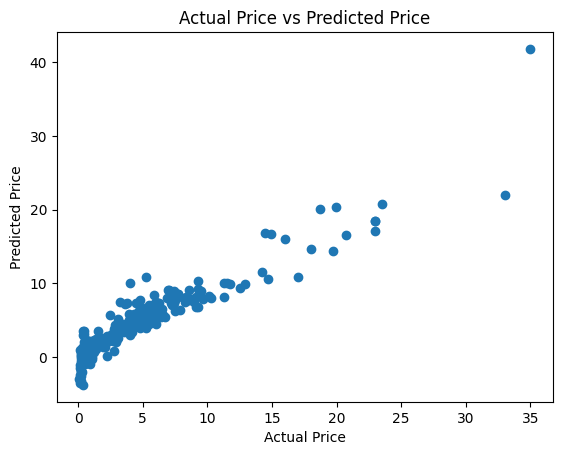

In [ ]:
plt.scatter(Y_train , prediction_train)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [ ]:
#prediction on Test data
prediction_test=lin_reg.predict(X_test)

In [ ]:
error_score=metrics.r2_score(Y_test,prediction_test)
print("R squared Error : ",error_score)

R squared Error :  0.8365766715027051


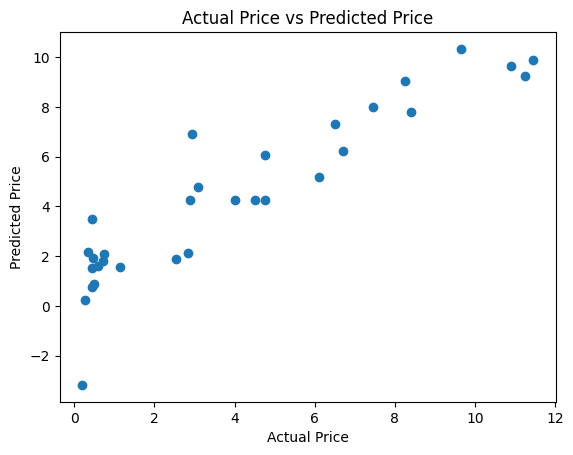

In [ ]:
plt.scatter(Y_test , prediction_test)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

**Lasso Regression**

In [ ]:
lasso_reg=Lasso()

In [ ]:

lasso_reg.fit(X_train, Y_train)

Lasso()

**Model Evalutaion**

In [ ]:
#Prediction on Training Data
prediction_train=lasso_reg.predict(X_train)


In [ ]:
#R squared Error
error_score=metrics.r2_score(Y_train,prediction_train)
print("R squared Error : ",error_score)

R squared Error :  0.8427856123435794


**Visualise the Actual and Predicted Price**

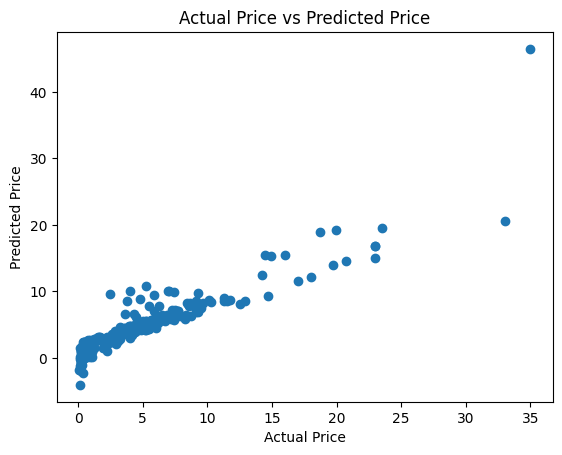

In [ ]:
plt.scatter(Y_train , prediction_train)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [ ]:
#prediction on Test data
prediction_test=lasso_reg.predict(X_test)

In [ ]:
error_score=metrics.r2_score(Y_test,prediction_test)
print("R squared Error : ",error_score)

R squared Error :  0.8365766715027051


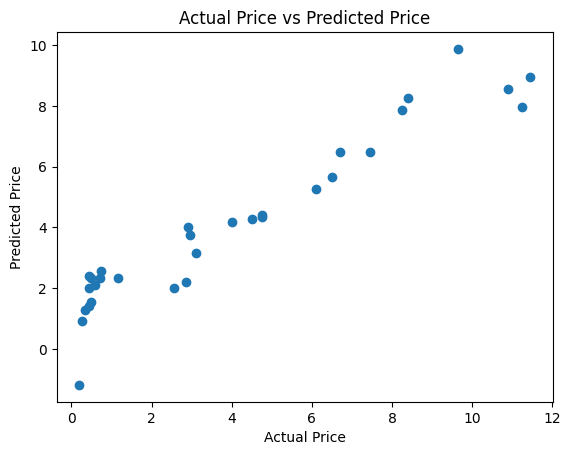

In [ ]:
plt.scatter(Y_test , prediction_test)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

## **Thank You !**